# 01. Neural Network Regression with TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

In this notebook, we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

Don't worry if none of these make sense now, we're going to go through each.

## How you can use this notebook

You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


### Create data to view and fit

(2, 2)

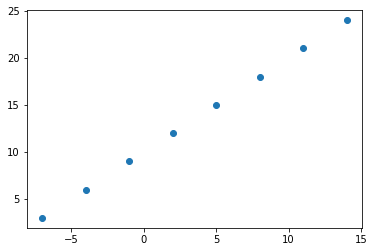

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))

# Create labels
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))
plt.scatter(x,y) 
x_new =tf.expand_dims(x,axis =0)
y_new =tf.expand_dims(y,axis =0)
y_new.ndim,x_new.ndim



In [ ]:
y == x+10

<tf.Tensor: shape=(8,), dtype=bool, numpy=array([ True,  True,  True,  True,  True,  True,  True,  True])>

### Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

### Steps in modeling Tensorflow model
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [ ]:
# Creating a model
model_v1 = tf.keras.Sequential()
model_v1.add(tf.keras.layers.Dense(1))

# compiling the model_v1
model_v1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

# Fit the model_v1

model_v1.fit(x_new,y_new,epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 452ms/step - loss: 16.6681 - mae: 16.6681
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.8981 - mae: 11.8981
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 8.0641 - mae: 8.0641
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 6.8716 - mae: 6.8716
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 6.2145 - mae: 6.2145


In [ ]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
pred = tf.constant([14],shape=(1,8),)

### Improving our model

In [ ]:
# Creating a model
model_v2 = tf.keras.Sequential()
model_v2.add(tf.keras.layers.Dense(100,activation='relu'))
model_v2.add(tf.keras.layers.Dense(100,activation='relu'))
model_v2.add(tf.keras.layers.Dense(1))

# compiling the model_v2
model_v2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=['mae'])

# Fit the model_v2

model_v2.fit(x_new,y_new,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 621ms/step - loss: 15.8321 - mae: 15.8321
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4040 - mae: 7.4040
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 6.0000 - mae: 6.0000
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 6.0000 - mae: 6.0000
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 6.0000 - mae: 6.0000
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 6.0000 - mae: 6.0000
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 6.0000 - mae: 6.0000
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 6.0000 - mae: 6.0000
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 6.0000 - mae: 6.0000
Epoch 10/100
1/1 [==============================] - 0s 39ms/step - loss: 6.0000 - mae: 6.0000
Epoch 11/100
1/1 [==============================] - 0s 27ms/step - l

In [ ]:
# Comparing the result of both small and big model
print(f'Small model accuracy: {model_v1.predict(pred)} ')
print(f'Big model accuracy: {model_v2.predict(pred)}')


Small model accuracy: [[-15.623142]] 
Big model accuracy: [[14.427089]]


### Improving the model further on my own

In [ ]:

# Creating a model
model_v3 = tf.keras.Sequential()
model_v3.add(tf.keras.layers.Dense(100,activation='relu',))
model_v3.add(tf.keras.layers.Dense(100,activation='relu',))
model_v3.add(tf.keras.layers.Dense(100,activation='relu',))
model_v3.add(tf.keras.layers.Dense(1))

# compiling the model_v3
model_v3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

# Fit the model_v3

model_v3.fit(x_new,y_new,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9280 - mae: 12.9280
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.7671 - mae: 11.7671
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 10.6965 - mae: 10.6965
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.8363 - mae: 9.8363
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 9.0836 - mae: 9.0836
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3592 - mae: 8.3592
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8242 - mae: 7.8242
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.3252 - mae: 7.3252
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 6.8249 - mae: 6.8249
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 6.5254 - mae: 6.5254
Epoch 11/100
1/1 [==============================] - 0s 13ms/step 

In [ ]:

# Creating a model
model_v4 = tf.keras.Sequential()
model_v4.add(tf.keras.layers.Dense(100,activation='relu',))
model_v4.add(tf.keras.layers.Dense(100,activation='relu',))
model_v4.add(tf.keras.layers.Dense(100,activation='relu',))
model_v4.add(tf.keras.layers.Dense(100,activation='relu',))
model_v4.add(tf.keras.layers.Dense(1))

# compiling the model_v4
model_v4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['mae'])

# Fit the model_v4

model_v4.fit(x_new,y_new,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9035 - mae: 13.9035
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 6.4908 - mae: 6.4908
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3636 - mae: 13.3636
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 6.1239 - mae: 6.1239
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 7.0759 - mae: 7.0759
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 8.0429 - mae: 8.0429
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1566 - mae: 8.1566
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 7.7193 - mae: 7.7193
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.7951 - mae: 6.7951
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.0000 - mae: 6.0000
Epoch 11/100
1/1 [==============================] - 0s 19ms/step - l

In [ ]:
# The more the result is near to 14 (which is inside the pred variable) the more the model is accurate
print(f"Result of model 1: {model_v1.predict(tf.expand_dims(pred,axis=0))}")
print(f"Result of model 2: {model_v2.predict(tf.expand_dims(pred,axis=-1))}")
print(f"Result of model 3: {model_v3.predict(tf.expand_dims(pred,axis=-1))}")
print(f"Result of model 4: {model_v4.predict(tf.expand_dims(pred,axis=-1))}")


Result of model 1: [[[-15.623142]]]
Result of model 2: [[14.427089]]
Result of model 3: [[12.227598]]
Result of model 4: [[12.856389]]


### Evaluating the model
>In practice, a typical model workflow you'll go through when building your neural network:
```
Build the model --> Fit it --> Evalute it --> Tweak the model --> Fit it --> Evalute it --> Tweak the model....
```


In [ ]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
x_train = x[:40]
y_train = y[:40]

x_test = x[40:]
y_test = x[40:]

len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

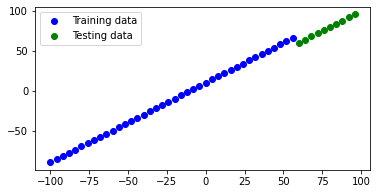

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Plot training data in blue
plt.scatter(x_train,y_train,c='b',label='Training data')
plt.scatter(x_test,y_test,c='g',label='Testing data')
plt.legend()


In [ ]:
x[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# 1. Creating a model 

model = tf.keras.Sequential(name='Asad_Pro')
model.add(tf.keras.layers.Dense(100,activation='relu',input_shape=([1]),name="layer0"))
model.add(tf.keras.layers.Dense(100,activation='relu',name="layer1"))
model.add(tf.keras.layers.Dense(100,activation='relu',name="layer2"))
model.add(tf.keras.layers.Dense(1,name="output_layer"))
  
# 2. Compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss=tf.keras.losses.mae, metrics=["mae"])

# 3. Fit the model
model.fit(x_train,y_train,epochs=50,batch_size=32,verbose=0)


In [ ]:

y_pred = model.predict(x_test)
y_test,y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 array([[61.167217],
        [64.77538 ],
        [68.38356 ],
        [71.99174 ],
        [75.5999  ],
        [79.20807 ],
        [82.81624 ],
        [86.4244  ],
        [90.03275 ],
        [93.64273 ]], dtype=float32))

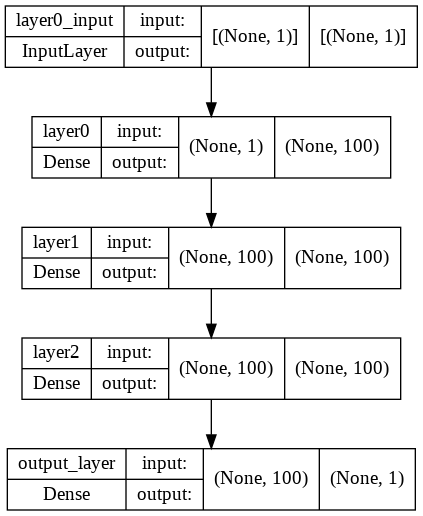

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

## Visualzing our model predictions

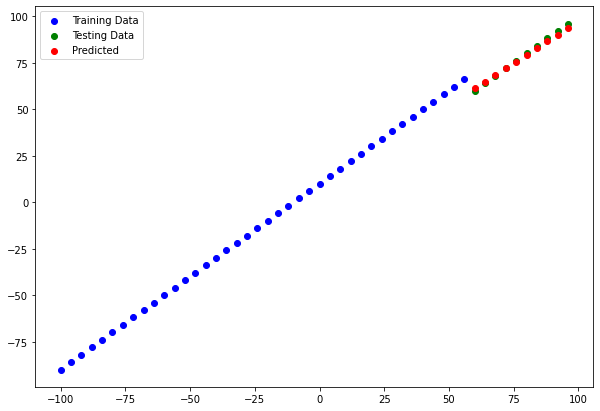

In [ ]:
# creating plot function
def plot_prediction(train_data = x_train,train_labels= y_train, test_data= x_test,test_labels= y_test,predictions=y_pred):
  """Plots training data and test data and compare ground truth to them"""
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c='b',label='Training Data')
  plt.scatter(test_data,test_labels,c='g',label='Testing Data')
  plt.scatter(test_data,predictions,c='r',label='Predicted')
  plt.legend()
plot_prediction()

In [ ]:
tf.keras.losses.mean_absolute_error(y_test,tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.066227, 14.33477 , 12.246576, 10.803305, 10.08002 , 10.      ,
       10.563248, 11.76976 , 13.619652, 16.114185], dtype=float32)>

In [ ]:
# Calculating the mean absolute error
mae= tf.keras.losses.mean_absolute_error(y_true = y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.0610332>

In [ ]:
# Calculating the mean square error

mse = tf.keras.losses.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.6208622>

In [ ]:
# Saving model method # 1
model.save('new_model')

INFO:tensorflow:Assets written to: new_model/assets


In [ ]:
# Saving model method # 2
model.save('method_2.h5')

In [ ]:
# Loading model back and check it's summary 
save_model = tf.keras.models.load_model('method_2.h5')
save_model.summary()

Model: "Asad_Pro"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer0 (Dense)              (None, 100)               200       
                                                                 
 layer1 (Dense)              (None, 100)               10100     
                                                                 
 layer2 (Dense)              (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# asad = tf.constant([
#                     [4,2,3,1],
#                     [3,2,2,4],
#                     [2,2,2,3]
#                     ])
from numpy import int64,int32,float64
ten = tf.constant([1, 2, 3, 4, 5, 6],dtype=float64,shape=(2,3))
tenso = tf.constant([2,6,3,7,4,8],dtype=int32,shape=(3,2),name='tenso')
tenso

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 6],
       [3, 7],
       [4, 8]], dtype=int32)>

In [ ]:
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))

random = tf.random.Generator.from_seed(5)
random = tf.random.normal(shape=(2,2),seed=(42))
random

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.28077507, -0.1377521 ],
       [-0.6763296 ,  0.02458041]], dtype=float32)>

In [ ]:

seeder = tf.random.set_seed(42)
new_random = tf.random.uniform(shape=(5,5),minval=0,maxval=2,dtype=int32)
new_random

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [1, 0, 1, 0, 1]], dtype=int32)>

In [ ]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled
tf.random.set_seed(42)
shuffled = tf.random.shuffle(not_shuffled)
shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

In [ ]:
zeros = tf.zeros(shape=(4,4))
ones = tf.ones(shape=(4,4))
zeros, ones

(<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(4, 4), dtype=float32, numpy=
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=float32)>)

In [ ]:
import numpy as np

arr = np.array([[1, 2, 3, 4, 5],[11, 22, 33, 44, 55]])
arr_tensor = tf.constant(arr, shape=(5,2))
arr_tensor

arrange = np.arange(1,25,2,dtype=int64) # int64 will take more space than int32 on memory because of precision points
arrange

tens = tf.constant(arrange, shape=(3,2,2))
tens

<tf.Tensor: shape=(3, 2, 2), dtype=int64, numpy=
array([[[ 1,  3],
        [ 5,  7]],

       [[ 9, 11],
        [13, 15]],

       [[17, 19],
        [21, 23]]])>

In [ ]:
# shape, rank , size

tens.shape, tens.ndim, tf.size(tens).numpy()

simple = tf.constant(
  [
   [
   [10,7,2],
   [3,5,2]
   ],
   [
   [13,1,12],
   [23,55,22]
   ]
 
 ])
simple.shape[-1]

3

In [ ]:
simple[:2, :2, :2]


<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  5]],

       [[13,  1],
        [23, 55]]], dtype=int32)>

In [ ]:
a = [[4.0, 4, 4.0], [3.0, 3, 3.6], [3.5, 6, 4.8]]

# Output required 4.0, 3.0, 3.5

a[:1]

[[4.0, 4, 4.0]]

In [ ]:

# arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10],[11, 12, 13, 14, 15]])
# print(arr[0:3,1:4])
arr = np.array(['apple', 'banana', 'cherry'],dtype='S')
arr1 = np.array(['1','2','3','4'],dtype='S')
arr1.dtype
dup_arr = arr1.astype('i')
dup_arr.dtype

dtype('int32')

In [ ]:
# Turing the above array into tensor

arr_to_tensor = tf.constant(arr, shape = (3),dtype='string')
arr_to_tensor

<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'apple', b'banana', b'cherry'], dtype=object)>

##**Copy and view**
* when we do changes in a copy the original will not be effeted 
* when we do changes in a view the orginal file will effect

In [ ]:
# create a copy of an array 
copy_array = arr.copy()
copy_array[0] = 'Tomato'
copy_array, arr

(array([b'Tomato', b'banana', b'cherry'], dtype='|S6'),
 array([b'apple', b'banana', b'cherry'], dtype='|S6'))

In [ ]:
# create a view of an array and make some changes into view and see the effect in original array
array1 = np.array([1,2,3,4])
array_view = array1.view()
array_view[0]=11
array1, array_view # Now here you you can see both of the array are the same.


(array([11,  2,  3,  4]), array([11,  2,  3,  4]))

In [ ]:
# Reshaping the array 
arr = np.array([1, 2, 3, 4], ndmin=2)
arr.shape
new_arr = arr.reshape(1,2,2) 
new_arr.shape,arr.shape


((1, 2, 2), (1, 4))

In [ ]:
# Reshape From 1-D to 3-D
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
change_dim = arr.reshape(2,2,3)
change_dim.ndim,arr.ndim

for x in arr:
  print('Number: ',x)

Number:  1
Number:  2
Number:  3
Number:  4
Number:  5
Number:  6
Number:  7
Number:  8
Number:  9
Number:  10
Number:  11
Number:  12


In [ ]:
# converting a 3D array into 1D or vector array of flattening it as we do in CNN architecture

tensor = tf.constant([[[ 1,  2,  3],
                 [ 4,  5,  6]],

               [ [ 7,  8,  9],
                 [10, 11, 12]
               ]])
tensor
tensor_new = tf.reshape(tensor,shape=(-1))
tensor_new
# Looping through every element of tensor
for x in tensor:
  for y in x:
    for z in y:
      print(z.numpy())

for item in np.nditer(x):
  print(item)


1
2
3
4
5
6
7
8
9
10
11
12
7
8
9
10
11
12


In [ ]:
# concatenation using stack method
arr1 = np.array([1, 2, 3])

arr2 = np.array([4, 5, 6])

arr = np.stack((arr1, arr2), axis=0)

print(arr)

[[1 2 3]
 [4 5 6]]


In [ ]:
# concatenation of array using simple concatenation
arr4 = arr1.copy()
arr5 = arr2.copy()

new_arr = np.concatenate((arr1, arr2), axis=0)
new_arr.ndim

1

In [ ]:
tensor = tf.constant([[10, 7], [3, 4]])
tensor+19
tensor_copy = tensor+80 # like addition we can do all BDMAS Operations on it.
# multiplication using tensorflow method

tensor_mul = tf.multiply(tensor,10)
tensor_mul


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
matrix_1 = tf.constant([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],shape=(5,3))  
matrix_2 = tf.constant([43,12,54,32,43,65,77,54,53,76,34,65,43,23,43], shape=(3,5))

tf.matmul(matrix_1,matrix_2)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 275,  361,  291,  207,  324],
       [ 701,  823,  744,  531,  810],
       [1127, 1285, 1197,  855, 1296],
       [1553, 1747, 1650, 1179, 1782],
       [1979, 2209, 2103, 1503, 2268]], dtype=int32)>